In [3]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

%matplotlib inline

summary = pd.read_csv('summary.csv', index_col=0)
height = pd.read_csv('height.csv', index_col=0)
width = pd.read_csv('width.csv', index_col=0)
frames_info = pd.read_csv('frames_info.csv', index_col=0)

In [4]:
summary

,mean_h,std_h,norm_std_h,mean_w,std_w,norm_std_w,mean_a,std_a,norm_std_a,mAP_slice,mAP_no_slice
WLAN_WAC_1,113.596747,53.247454,0.468741,103.296005,200.515260,1.941172,11844.648675,25572.905577,2.159026,0.737,0.472
WLAN_WAC_3,112.881555,54.033523,0.478675,59.027325,103.319785,1.750372,6461.115938,12745.532917,1.972652,0.820,0.534
WLAN_WAC_7,112.398686,54.770722,0.487290,33.093210,45.532946,1.375900,3544.835598,5378.573576,1.517298,0.917,0.687
WLAN_WN_0,72.173887,46.819530,0.648705,477.073797,332.891689,0.697778,35118.786077,33831.790908,0.963353,0.711,0.796
WLAN_WN_1,76.105098,48.251483,0.634011,58.961794,93.955668,1.593501,4172.641643,8209.045091,1.967350,0.800,0.549
WLAN_WN_2,68.856656,47.773768,0.693815,224.875390,111.073440,0.493933,15284.426625,12926.173255,0.845709,0.498,0.674
WLAN_WN_3,77.594895,48.329174,0.622840,36.422869,49.205411,1.350948,2576.836407,4145.337439,1.608693,0.874,0.472
WLAN_WN_7,79.394438,48.570668,0.611764,22.532207,22.101934,0.980904,1671.893055,2000.717091,1.196678,0.914,0.537
WLAN_WBG_0,70.821211,46.888052,0.662062,283.836779,310.172563,1.092785,20871.358793,29121.895799,1.395304,0.633,0.719
WLAN_WBG_1,70.391102,47.311128,0.672118,82.111978,91.416327,1.113313,5717.635390,8440.781765,1.476271,0.425,0.421


Height Plotting wrt to mAP

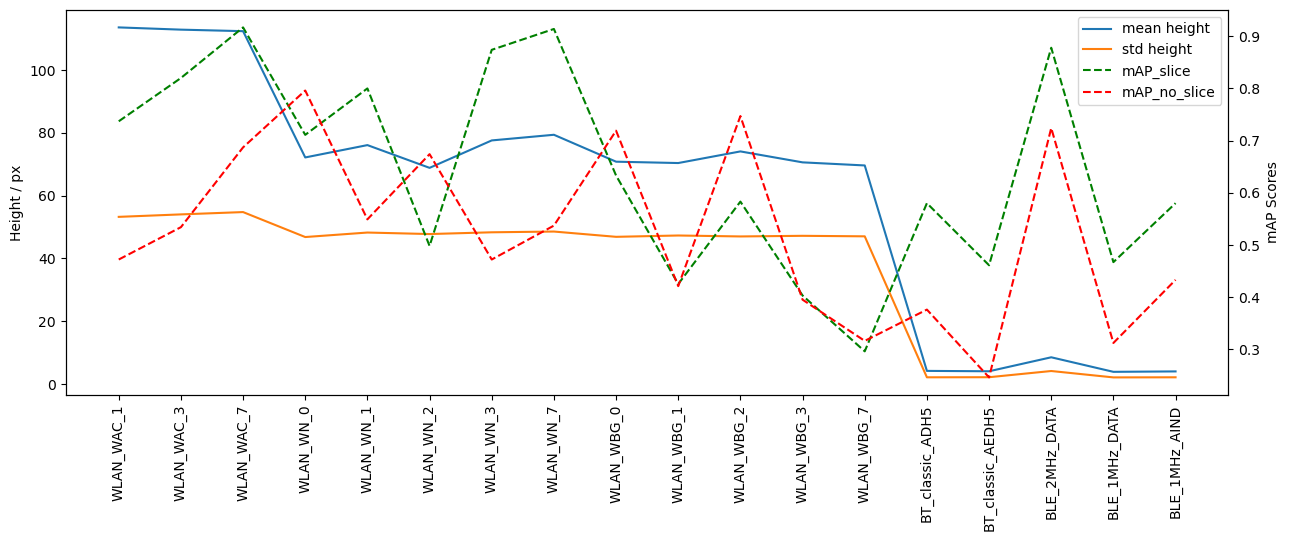

In [39]:
fig, ax = plt.subplots()

# Plotting the main variables of interest
ax.plot(summary.index, summary['mean_h'], label="mean height")
ax.plot(summary.index, summary['std_h'], label="std height")
# ax.plot(summary.index, summary['norm_std_h'])
plt.xticks(rotation=90)


# Plotting the mAP Scores
ax2 = ax.twinx()
ax2.plot(summary.index, summary['mAP_slice'], color="green", linestyle="dashed", label="mAP_slice")
ax2.plot(summary.index, summary['mAP_no_slice'], color="red", linestyle="dashed", label="mAP_no_slice")

ax.set_ylabel("Height / px")
ax2.set_ylabel("mAP Scores")


fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.set_size_inches(15,5)
plt.show()

Width Plotting wrt to mAP

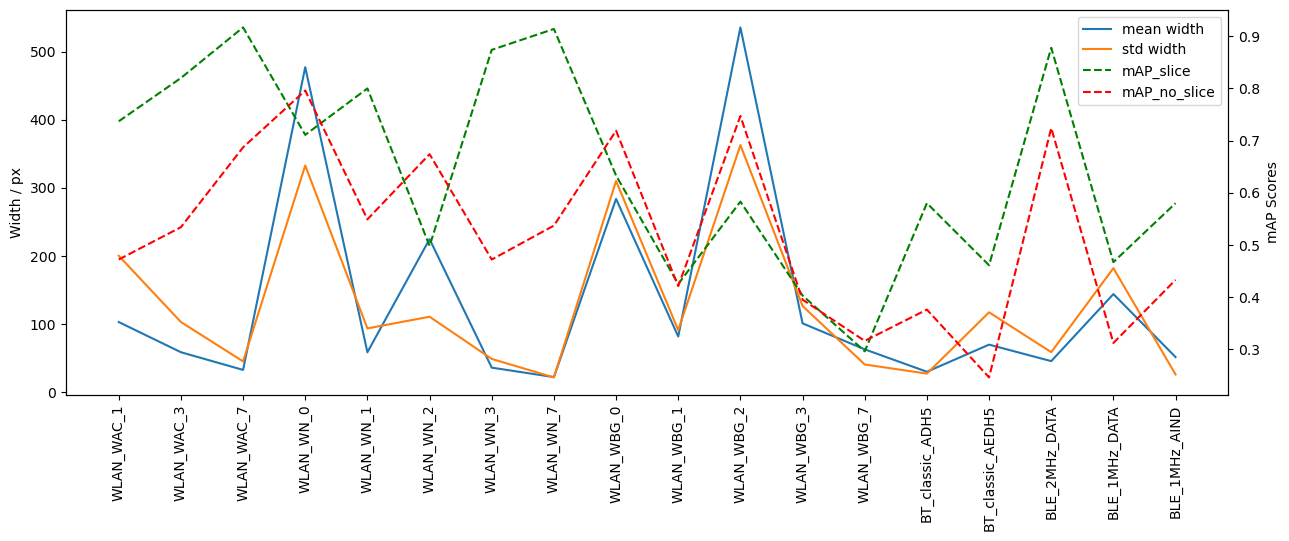

In [40]:
fig, ax = plt.subplots()

# Plotting the main variables of interest
ax.plot(summary.index, summary['mean_w'], label="mean width")
ax.plot(summary.index, summary['std_w'], label="std width")
# ax.plot(summary.index, summary['norm_std_h'])
plt.xticks(rotation=90)


# Plotting the mAP Scores
ax2 = ax.twinx()
ax2.plot(summary.index, summary['mAP_slice'], color="green", linestyle="dashed", label="mAP_slice")
ax2.plot(summary.index, summary['mAP_no_slice'], color="red", linestyle="dashed", label="mAP_no_slice")

ax.set_ylabel("Width / px")
ax2.set_ylabel("mAP Scores")

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.set_size_inches(15,5)
plt.show()

Area Plotting wrt to mAP

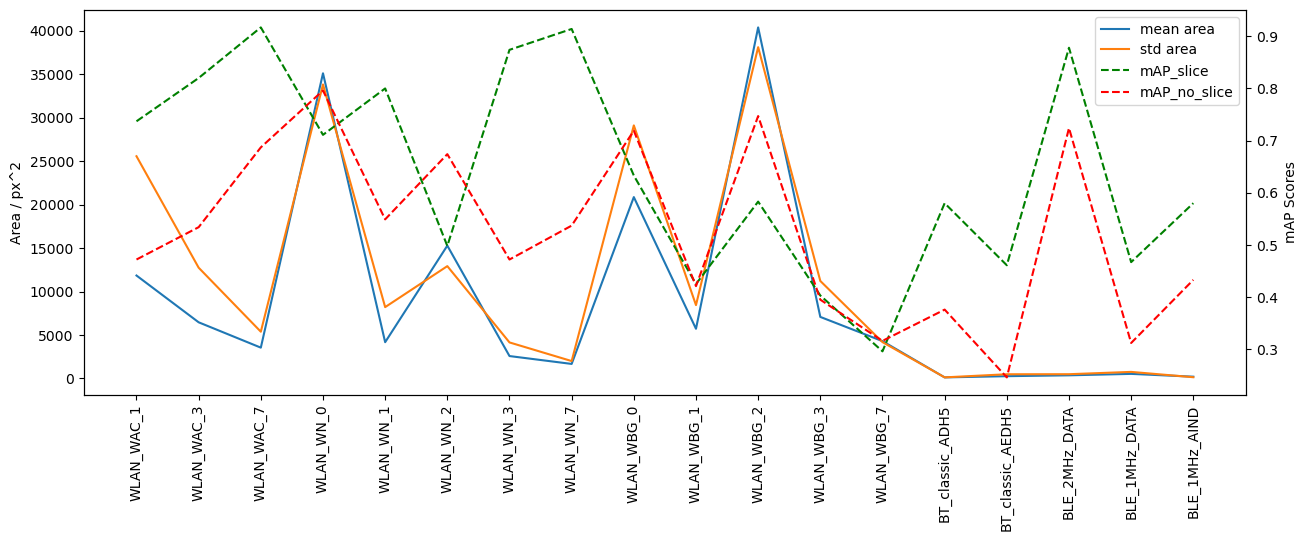

In [41]:
fig, ax = plt.subplots()

# Plotting the main variables of interest
ax.plot(summary.index, summary['mean_a'], label="mean area")
ax.plot(summary.index, summary['std_a'], label="std area")
# ax.plot(summary.index, summary['norm_std_h'])
plt.xticks(rotation=90)


# Plotting the mAP Scores
ax2 = ax.twinx()
ax2.plot(summary.index, summary['mAP_slice'], color="green", linestyle="dashed", label="mAP_slice")
ax2.plot(summary.index, summary['mAP_no_slice'], color="red", linestyle="dashed", label="mAP_no_slice")


ax.set_ylabel("Area / px^2")
ax2.set_ylabel("mAP Scores")

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.set_size_inches(15,5)
plt.show()